In [1]:
import splitfolders
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
input_folder = 'databirds/'

In [4]:
splitfolders.ratio(input_folder, output="databirds2/", seed=42, ratio=(.7, .2, .1), group_prefix=None)

Copying files: 41650 files [01:13, 568.75 files/s]


In [3]:
datagen = ImageDataGenerator(
                horizontal_flip=True,
                rescale=(1./128) - 1
              )

datagen_test = ImageDataGenerator(
              rescale=(1./128) - 1
              )

In [4]:
train_batches = datagen.flow_from_directory('databirds2/train/', batch_size=32, class_mode = 'categorical', target_size=(224, 224))
test_batches = datagen_test.flow_from_directory('databirds2/test/', batch_size=32, class_mode = 'categorical', target_size=(224, 224))

Found 28695 images belonging to 6 classes.
Found 4089 images belonging to 6 classes.


## My Model

In [5]:
input_shape = (224, 224, 3)
n_classes = 10
img_dims = 224

model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(5, 5), strides=(2, 2), padding='valid',input_shape=(224,224,3)))
model.add(layers.BatchNormalization(axis=3, scale=False))

model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='valid'))
model.add(layers.BatchNormalization(axis=3, scale=False))

model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='valid'))
model.add(layers.BatchNormalization(axis=3, scale=False))

model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(layers.BatchNormalization(axis=3, scale=False))

model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='valid'))
model.add(layers.BatchNormalization(axis=3, scale=False))


model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))


model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(n_classes, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 32)      96        
_________________________________________________________________
activation (Activation)      (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 53, 32)        96        
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        5

In [6]:
import os 
checkpoint_path = "model/cp.ckpt.index"
checkpoint_dir = os.path.dirname(checkpoint_path)
#model.load_weights(checkpoint_path)
os.listdir(checkpoint_dir)

['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']

In [7]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'model\\cp.ckpt'

In [8]:
model.load_weights(latest)


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D901A0FC48> and <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001D901A361C8>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001D901A24608> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D901A0FC48>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D901A24588> and <tensorflow.python.keras.layers.core.Activation object at 0x000001D901B29508>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001D901D21748> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D901A24588>).

Two checkpoint references resolved to different obje

In [9]:
for layer in model.layers:
    layer.trainable = False

model.summary()    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 32)      96        
_________________________________________________________________
activation (Activation)      (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 53, 32)        96        
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        5

In [10]:
modelTL = keras.models.Sequential()
for layer in model.layers[0:-1]:
    modelTL.add(layer)

In [11]:
modelTL.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 32)      96        
_________________________________________________________________
activation (Activation)      (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 53, 32)        96        
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)       

In [12]:
modelTL.add(layers.Dense(6, activation='softmax'))

In [13]:
modelTL.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 32)      96        
_________________________________________________________________
activation (Activation)      (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 53, 32)        96        
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)       

In [14]:
sgd = SGD(learning_rate=0.1)

In [15]:
modelTL.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [16]:
hist = modelTL.fit(
                train_batches,
                #batch_size=batch_size,
                epochs=10,
                validation_data = test_batches,
                #validation_steps= images_per_class_test * n_classes / batch_size,
                #callbacks=[cp_callback] 
                )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 897 steps, validate for 128 steps
Epoch 1/10
897/897 [==============================] - 81s 90ms/step - loss: 1.2973 - accuracy: 0.4992 - val_loss: 1.2548 - val_accuracy: 0.5136
Epoch 2/10
897/897 [==============================] - 61s 68ms/step - loss: 1.2544 - accuracy: 0.5116 - val_loss: 1.2575 - val_accuracy: 0.5055
Epoch 3/10
897/897 [==============================] - 61s 68ms/step - loss: 1.2520 - accuracy: 0.5132 - val_loss: 1.2421 - val_accuracy: 0.5163
Epoch 4/10
897/897 [==============================] - 60s 67ms/step - loss: 1.2488 - accuracy: 0.5133 - val_loss: 1.2546 - val_accuracy: 0.5067
Epoch 5/10
897/897 [==============================] - 60s 67ms/step - loss: 1.2478 - accuracy: 0.5144 - val_loss: 1.2511 - val_accuracy: 0.5170
Epoch 6/10
897/897 [==============================] - 61s 68ms/step - loss: 1.2483 - accuracy: 0.5112 - val_loss: 1.2376 - val_accuracy: 0.5190
Epoch 7/10
897/897 [======================

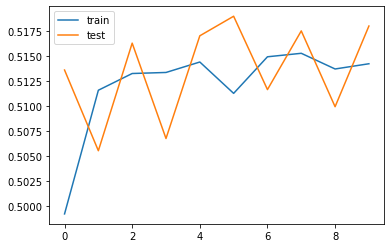

In [17]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend()

In [18]:
from sklearn.metrics import f1_score
predictions = modelTL.predict(test_batches)
predictions = tf.argmax(predictions, axis=-1)
predictions

<tf.Tensor: shape=(4089,), dtype=int64, numpy=array([2, 0, 0, ..., 4, 0, 0], dtype=int64)>

In [19]:
y_pred = predictions.numpy()
y_true = test_batches.labels
f1 = f1_score(y_true, y_pred, average='macro') 
f1

0.1509590151539649

<AxesSubplot:>

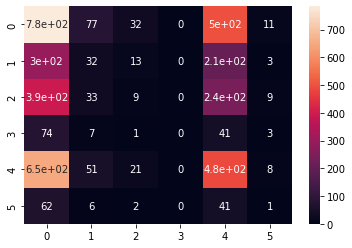

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y_true, y_pred)
#matrix
plt.figure()
sns.heatmap(matrix, annot=True)


## MobileNetV2

In [24]:
IMG_SHAPE = (224, 224, 3)


base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [25]:
base_model.trainable = False

In [26]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(6)

In [27]:
modelMNV = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

sgd = SGD(learning_rate=0.1)
modelMNV.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [28]:
modelMNV.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 7686      
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [29]:
history = modelMNV.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 897 steps, validate for 128 steps
Epoch 1/10
897/897 [==============================] - 78s 87ms/step - loss: 6.5910 - accuracy: 0.0240 - val_loss: 4.3332 - val_accuracy: 0.0274
Epoch 2/10
897/897 [==============================] - 63s 70ms/step - loss: 6.1635 - accuracy: 0.0242 - val_loss: 4.5338 - val_accuracy: 0.0274
Epoch 3/10
897/897 [==============================] - 63s 70ms/step - loss: 6.2495 - accuracy: 0.0241 - val_loss: 4.6203 - val_accuracy: 0.0274
Epoch 4/10
897/897 [==============================] - 65s 73ms/step - loss: 6.2041 - accuracy: 0.0236 - val_loss: 4.3999 - val_accuracy: 0.0274
Epoch 5/10
897/897 [==============================] - 65s 73ms/step - loss: 6.3342 - accuracy: 0.0239 - val_loss: 4.7383 - val_accuracy: 0.0274
Epoch 6/10
897/897 [==============================] - 66s 74ms/step - loss: 6.3494 - accuracy: 0.0242 - val_loss: 4.5770 - val_accuracy: 0.0274
Epoch 7/10
897/897 [==============================] - 66s 73ms/step - loss: 6.3361 - accurac

In [31]:
predictions2 = modelMNV.predict(test_batches)
predictions2 = tf.argmax(predictions2, axis=-1)
predictions2

<tf.Tensor: shape=(4089,), dtype=int64, numpy=array([5, 5, 5, ..., 5, 5, 5], dtype=int64)>

In [32]:
y_pred2 = predictions2.numpy()
y_true2 = test_batches.labels
f12 = f1_score(y_true2, y_pred2, average='macro') 
f12

0.008903728436282692

<AxesSubplot:>

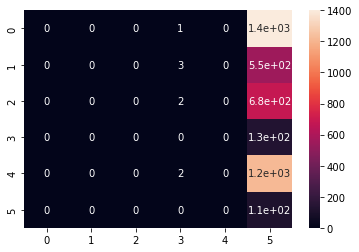

In [33]:
matrix2 = confusion_matrix(y_true2, y_pred2)
#matrix
plt.figure()
sns.heatmap(matrix2, annot=True)